In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import re
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots 

In [2]:
# Read in the data

df = pd.read_csv(r'C:\Users\Matt Pedicini\Downloads\movies\movies.csv')
df = pd.DataFrame(df)

In [3]:
# We're going to be looking for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull()) 
    print('{} - {}%'.format(col, pct_missing)) #the percent number of rows per column with null values

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
# delete rows with missing data
rows = len(df) # old rows
df = df.dropna()
newrows = len(df) # rows after deletion
print('{} rows removed'.format(rows-newrows))

2247 rows removed


In [5]:
# data types for columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
# change from float to int
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [7]:
#drop any duplicates

df = df.drop_duplicates()

# highest grossing director


In [8]:
# add profit column
df['profit'] = df['gross'] - df['budget']


In [66]:
g = df.groupby("director")
topten = g.mean().sort_values('profit',ascending = False)
topten = topten.head(10) 
topten = topten.index.tolist()
for i in topten:
    for director, moviedata in g:
        if i == director:
            print(director)
            print("-"*10)
            print(moviedata)
            print("-"*35)

Anthony Russo
----------
                                     name rating   genre  year  \
4991                   You, Me and Dupree  PG-13  Comedy  2006   
6448  Captain America: The Winter Soldier  PG-13  Action  2014   
6846           Captain America: Civil War  PG-13  Action  2016   
7244               Avengers: Infinity War  PG-13  Action  2018   
7445                    Avengers: Endgame  PG-13  Action  2019   

                            released  score     votes       director  \
4991   July 14, 2006 (United States)    5.6   79000.0  Anthony Russo   
6448   April 4, 2014 (United States)    7.7  764000.0  Anthony Russo   
6846     May 6, 2016 (United States)    7.8  694000.0  Anthony Russo   
7244  April 27, 2018 (United States)    8.4  897000.0  Anthony Russo   
7445  April 26, 2019 (United States)    8.4  903000.0  Anthony Russo   

                  writer               star        country     budget  \
4991     Michael LeSieur        Kate Hudson  United States   54000000   

In [10]:
pd.set_option('display.max_rows',None)
fd = df.sort_values(by=['gross'], inplace=False, ascending= False)
fd.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,profit
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2.610246e+09
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2.441501e+09
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,2.001647e+09
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,1.824522e+09
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,1.727360e+09


# Budget vs Gross

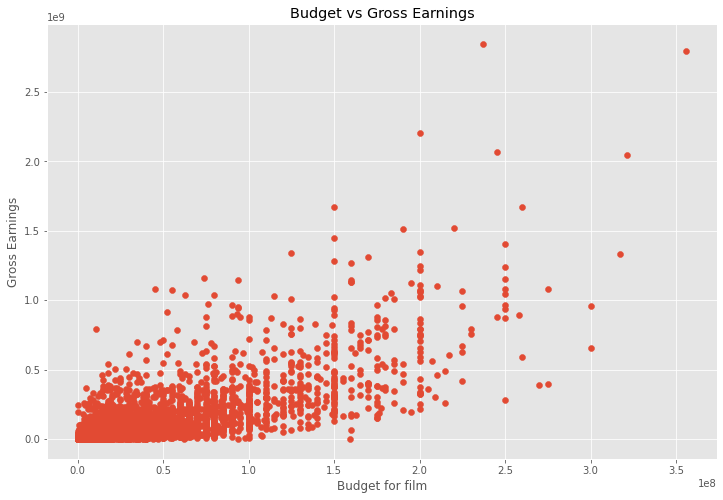

In [75]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Budget for film')

plt.ylabel('Gross Earnings')


plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

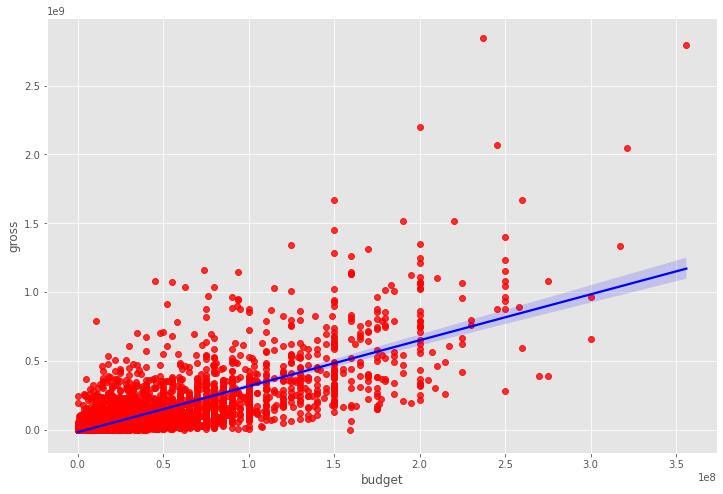

In [78]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget',y='gross',data=df, scatter_kws={"color":"red"},line_kws={"color":"blue"})

# Correlations

In [18]:
# correlation for numeric values

df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


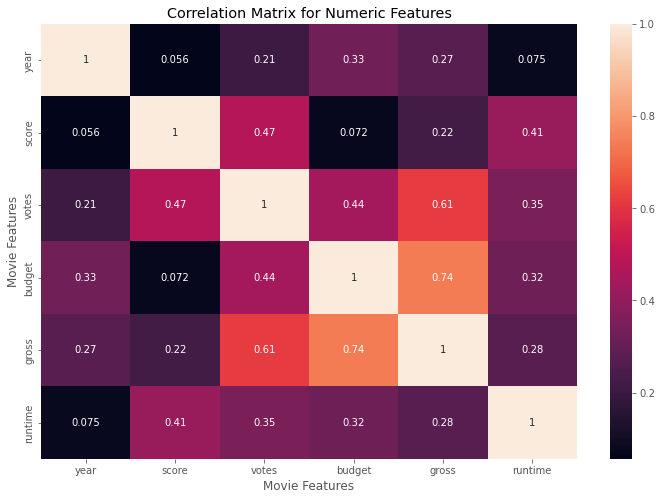

In [21]:
# using table to create heatmap
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot= True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')


plt.show()

In [79]:

# Gave each non-number value a number value to be used in correlation matrix
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes


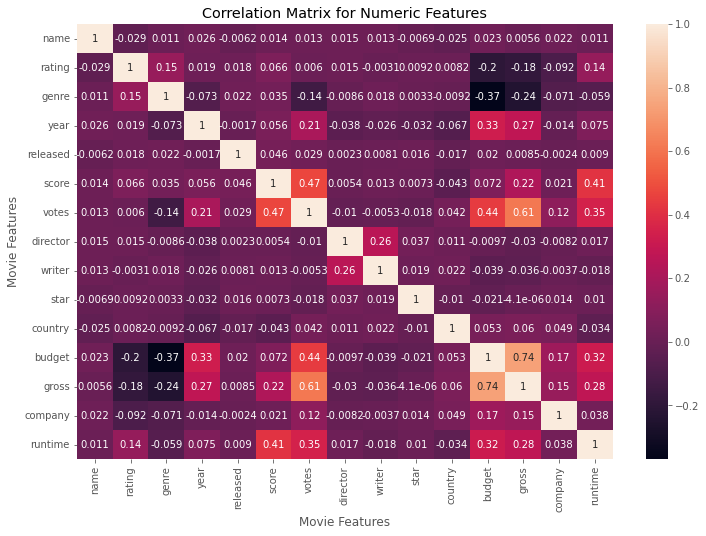

In [24]:
# Reinitializing correlation heatmap
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot= True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')


plt.show()

In [83]:
# sorting correlations comparisons from lowest to highest
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre    budget    -0.368523
budget   genre     -0.368523
gross    genre     -0.244101
genre    gross     -0.244101
rating   budget    -0.203946
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
runtime  runtime    1.000000
profit   profit     1.000000
Length: 256, dtype: float64

In [28]:
#get only correlations that are over 0.5
high_corr = sorted_pairs[(sorted_pairs)> 0.5]

high_corr

votes     gross       0.614751
gross     votes       0.614751
          budget      0.740247
budget    gross       0.740247
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64